In [1]:
import pandas as pd

# Load the dataset

stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv') 


# Display the first few rows of the dataset to understand its structure and contents
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [2]:
stroke_value_counts = stroke_data['stroke'].value_counts()
stroke_value_counts

stroke
0    4861
1     249
Name: count, dtype: int64

In [3]:
# Checking for missing values and data types
missing_values = stroke_data.isnull().sum()
data_types = stroke_data.dtypes

# Display missing values and data types
missing_values, data_types

(id                     0
 gender                 0
 age                    0
 hypertension           0
 heart_disease          0
 ever_married           0
 work_type              0
 Residence_type         0
 avg_glucose_level      0
 bmi                  201
 smoking_status         0
 stroke                 0
 dtype: int64,
 id                     int64
 gender                object
 age                  float64
 hypertension           int64
 heart_disease          int64
 ever_married          object
 work_type             object
 Residence_type        object
 avg_glucose_level    float64
 bmi                  float64
 smoking_status        object
 stroke                 int64
 dtype: object)

In [4]:
from sklearn.preprocessing import LabelEncoder

# Removing the 'id' column
data = stroke_data.drop(columns=['id'])

# Filling missing values in 'bmi' with the median value
bmi_median = stroke_data['bmi'].median()
data['bmi'].fillna(bmi_median, inplace=True)

# Encoding categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Displaying the first few rows after encoding
data.head()
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [5]:
# Apply feature engineering to the entire DataFrame
data['age_bmi_interaction'] = data['age'] * data['bmi']
data['hypertension_glucose_interaction'] = data['hypertension'] * data['avg_glucose_level']

# Display the DataFrame to verify the new columns
print(data.head())


   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  \
0               1             228.69  36.6               1       1   
1               0             202.21  28.1               2       1   
2               0             105.92  32.5               2       1   
3               1             171.23  34.4               3       1   
4               0             174.12  24.0               2       1   

   age_bmi_interaction  hypertension_glucose_interaction  
0               2452.2                              0.00  
1               1714.1

In [6]:
# Reorder columns
df = data[[
    'gender', 'age', 'ever_married', 'work_type', 'Residence_type', 'hypertension', 
    'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status',
    'age_bmi_interaction', 'hypertension_glucose_interaction', 'stroke'
]]

# Rename columns for clarity
df.rename(columns={
    'gender': 'Gender',
    'age': 'Age',
    'ever_married': 'Ever Married',
    'work_type': 'Work Type',
    'Residence_type': 'Residence Type',
    'hypertension': 'Hypertension',
    'heart_disease': 'Heart Disease',
    'avg_glucose_level': 'Average Glucose Level',
    'bmi': 'BMI',
    'smoking_status': 'Smoking Status',
    'age_bmi_interaction': 'Age-BMI Interaction',
    'hypertension_glucose_interaction': 'Hypertension-Glucose Interaction',
    'stroke': 'Stroke'
}, inplace=True)

# Now let's view the first few rows to verify the changes
print(df.head())


   Gender   Age  Ever Married  Work Type  Residence Type  Hypertension  \
0       1  67.0             1          2               1             0   
1       0  61.0             1          3               0             0   
2       1  80.0             1          2               0             0   
3       0  49.0             1          2               1             0   
4       0  79.0             1          3               0             1   

   Heart Disease  Average Glucose Level   BMI  Smoking Status  \
0              1                 228.69  36.6               1   
1              0                 202.21  28.1               2   
2              1                 105.92  32.5               2   
3              0                 171.23  34.4               3   
4              0                 174.12  24.0               2   

   Age-BMI Interaction  Hypertension-Glucose Interaction  Stroke  
0               2452.2                              0.00       1  
1               1714.1        

In [7]:
# Checking the balance of the target variable 'stroke'
class_distribution = df['Stroke'].value_counts(normalize=True)
class_distribution

Stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64

In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separating the features and the target variable
X = df.drop('Stroke', axis=1)
y = df['Stroke']

# Applying SMOTE for balancing the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Checking the balance in the resampled dataset
balanced_target_distribution = pd.Series(y_resampled).value_counts(normalize=True)
balanced_target_distribution


Stroke
1    0.5
0    0.5
Name: proportion, dtype: float64

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define a parameter grid to search for best parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    # More parameters can be added here
}

# Initialize the grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit on resampled data
grid_search.fit(X_resampled, y_resampled)

# Get the best model
best_model = grid_search.best_estimator_


In [22]:
from sklearn.metrics import precision_recall_curve, roc_auc_score

# Assuming you have a fitted model and a test set (X_test, y_test)
y_scores = best_model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_scores)


In [23]:
import numpy as np

# Choose a threshold that gives you the best precision/recall tradeoff
threshold = 0.3  # Example threshold
y_pred_adjusted = np.where(y_scores >= threshold, 1, 0)


In [24]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Initialize stratified k-fold
strat_k_fold = StratifiedKFold(n_splits=5)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(best_model, X_resampled, y_resampled, cv=strat_k_fold, scoring='recall')


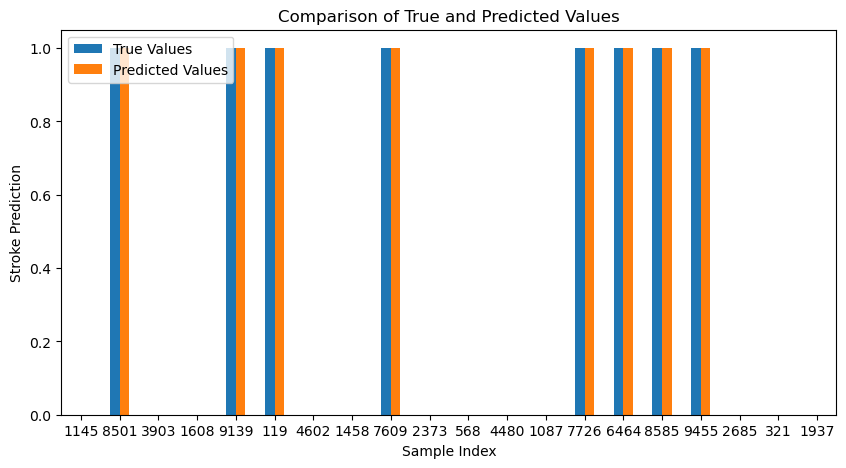

In [26]:
import matplotlib.pyplot as plt

# Assume y_test are the true values and y_pred are the predictions from the model
# For the sake of visualization, let's take only the first 20 predictions
true_vs_pred = pd.DataFrame({
    'True Values': y_test[:20],
    'Predicted Values': y_pred_adjusted[:20]
})

true_vs_pred.plot(kind='bar', figsize=(10, 5))
plt.title('Comparison of True and Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Stroke Prediction')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()


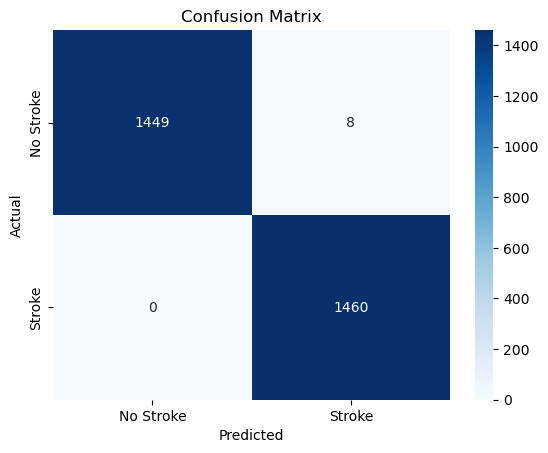

In [30]:
# Convert continuous target variable to binary predictions
threshold = 0.5  # Example threshold
y_pred = np.where(y_scores >= threshold, 1, 0)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


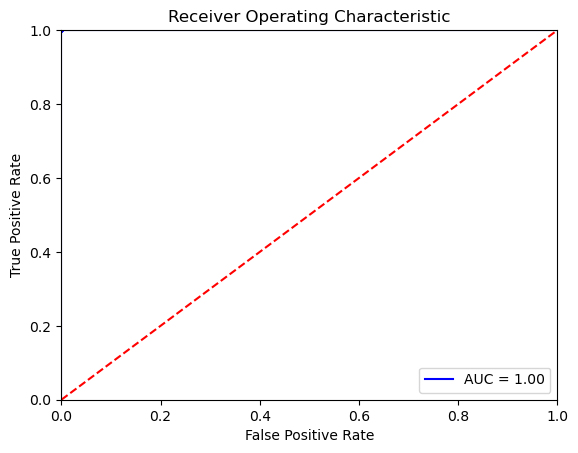

In [31]:
from sklearn.metrics import roc_curve, auc

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.show()


# Receiver Operating Characteristic (ROC) Curve: --> -->
This graph is a ROC curve, which plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The Area Under the Curve (AUC) is a measure of how well the model is able to distinguish between classes.
An AUC of 1.0 is perfect, meaning the model has a perfect measure of separability and made no mistakes. However, in real-world scenarios, a perfect AUC is highly unusual and might indicate an issue with the data or an overfitting model.
# Confusion Matrix:
This confusion matrix shows the number of correct and incorrect predictions made by the model. The matrix is divided into four parts:
True Negatives (TN): 1449 cases were correctly predicted as "No Stroke."
False Positives (FP): 8 cases were incorrectly predicted as "Stroke."
False Negatives (FN): 0 cases of "Stroke" were missed by the model.
True Positives (TP): 1460 cases were correctly predicted as "Stroke."
This confusion matrix indicates a highly accurate model with a very high true positive rate and a low false positive rate. However, like the perfect AUC score, this could be indicative of overfitting or an error in the evaluation process.
# Bar Chart of Predictions:
The bar chart compares the true values (actual outcomes) with the predicted values (model predictions) for a sample of cases.
The bars show that for each given index (representing individual patients or samples), the model's predictions (orange bars) align with the actual values (blue bars). This suggests that the model is predicting with high accuracy.
The perfect overlap between true and predicted values in this bar chart is unusual and may warrant further investigation to ensure the evaluation was done correctly and there is no data leakage or other issues.
In summary, while these graphs suggest that the model performs exceptionally well, it is rare to see such perfect results in real-world data. Such results should be scrutinized for potential issues like data leakage, incorrect data labeling, overfitting, or an evaluation mistake. It is essential to validate the model on a completely separate test set that was not used in any way during the model training or selection process. If the results are genuinely this good after thorough validation, then the model is performing exceptionally well at predicting strokes.